`wu_increasing_lin_tau_zero_pase_zero_noise_D.ipynb`

> data: `wu_10000_zero-noise_zero-spikes_integer-taus-wrapped.bz2`

> trying an older model

##### imports

In [1]:
import tensorflow as tf, numpy as np, pandas as pd, matplotlib.pyplot as plt, glob, sys, io

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter

from plot_styles import set_plotstyles
set_plotstyles()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'

/Users/andrew/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### import and preprocess data

In [5]:
#import data
data_df = pd.read_csv('../generating_data/data/wu_10000_zero-noise_zero-spikes_integer-taus-wrapped.bz2', compression = 'bz2')

# split random 80% / 20%
training_data_df = data_df.sample(frac = 0.8)
testing_data_df = data_df.loc[~data_df.index.isin(training_data_df.index)]

# separate input features from output
X_training = training_data_df.drop('tau', axis = 1).values
Y_training = training_data_df[['tau']].values

X_testing = testing_data_df.drop('tau', axis = 1).values
Y_testing = testing_data_df[['tau']].values

# setup data scalers
X_scaler = MinMaxScaler(feature_range = (0,1))
Y_scaler = MinMaxScaler(feature_range = (0,1))

# scale data
X_scaled_training = X_scaler.fit_transform(X_training)
Y_scaled_training = Y_scaler.fit_transform(Y_training)

X_scaled_testing = X_scaler.transform(X_testing)
Y_scaled_testing = Y_scaler.transform(Y_testing)

In [6]:
# setup layer & NN parameters
number_of_inputs = X_scaled_training.shape[1]
number_of_outputs = Y_scaled_training.shape[1]

#### Train NN round 1

In [7]:
layer_1_nodes = 115
layer_2_nodes = 280
layer_3_nodes = 450
layer_4_nodes = 290
layer_5_nodes = 205
layer_6_nodes = 105
layer_7_nodes = 50

learning_rate = 0.0015
training_epochs = 1500

In [8]:
# one random serial number per NN graph
# - add letters to end for repeated runs
# - only run this cell once!
log_random_serial_number = '{}'.format(np.random.randint(10000,99999))
# log_random_serial_number = 81230
log_random_serial_number

'81230'

In [9]:
def log_dir(log_random_serial_number):
    master_log_path = '../logs/'
    log_num = len(glob.glob(master_log_path + log_random_serial_number + '*'))
    
    direc = master_log_path + log_random_serial_number
    if log_num > 0:
        # assumes less than 26 runs per graph
        direc += chr(ord('@') + log_num)
    return direc

In [11]:
tf.reset_default_graph()

# Input Layer
with tf.variable_scope('input'):
    X  = tf.placeholder(tf.float32, shape = (None, number_of_inputs))

# Layer 1
with tf.variable_scope('layer_1'):

    biases = tf.get_variable(name = "biases1",
                             shape = [layer_1_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights1",
                              shape  = [number_of_inputs, layer_1_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_1_output = tf.nn.relu(tf.matmul(X, weights) + biases)

# Layer 2
with tf.variable_scope('layer_2'):

    biases = tf.get_variable(name = "biases2",
                             shape = [layer_2_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights2",
                              shape  = [layer_1_nodes, layer_2_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_2_output = tf.nn.relu(tf.matmul(layer_1_output, weights) + biases)

# Layer 3
with tf.variable_scope('layer_3'):

    biases = tf.get_variable(name = "biases3",
                             shape = [layer_3_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights3",
                              shape  = [layer_2_nodes, layer_3_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_3_output = tf.nn.relu(tf.matmul(layer_2_output, weights) + biases)

# Layer 4
with tf.variable_scope('layer_4'):

    biases = tf.get_variable(name = "biases4",
                             shape = [layer_4_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights4",
                              shape  = [layer_3_nodes, layer_4_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_4_output = tf.nn.relu(tf.matmul(layer_3_output, weights) + biases)


# Layer 5
with tf.variable_scope('layer_5'):

    biases = tf.get_variable(name = "biases5",
                             shape = [layer_5_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights5",
                              shape  = [layer_4_nodes, layer_5_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_5_output = tf.nn.relu(tf.matmul(layer_4_output, weights) + biases)

# Layer 6
with tf.variable_scope('layer_6'):

    biases = tf.get_variable(name = "biases6",
                             shape = [layer_6_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights6",
                              shape  = [layer_5_nodes, layer_6_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_6_output = tf.nn.relu(tf.matmul(layer_5_output, weights) + biases)

# Layer 7
with tf.variable_scope('layer_7'):

    biases = tf.get_variable(name = "biases7",
                             shape = [layer_7_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights7",
                              shape  = [layer_6_nodes, layer_7_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_7_output = tf.nn.relu(tf.matmul(layer_6_output, weights) + biases)




# Output layer

with tf.variable_scope('output'):

    biases = tf.get_variable(name = "biases_out",
                             shape = [number_of_outputs],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights_out",
                              shape  = [layer_7_nodes, number_of_outputs],
                         initializer = tf.contrib.layers.xavier_initializer())


    prediction = tf.nn.relu(tf.matmul(layer_7_output, weights) + biases)

with tf.variable_scope('cost'):

    Y = tf.placeholder(tf.float32, shape = (None, 1))
    cost = tf.reduce_mean(tf.squared_difference(prediction, Y))


with tf.variable_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate, epsilon=1e-08).minimize(cost)

with tf.variable_scope('logging'):
    tf.summary.scalar('current_cost', cost)
    summary = tf.summary.merge_all()
    


In [13]:
saver = tf.train.Saver()
log_direc = log_dir(str(81230))
print(log_direc)

../logs/81230


##### Training round 5

 epoch:    0 testing_cost: 0.1492746621

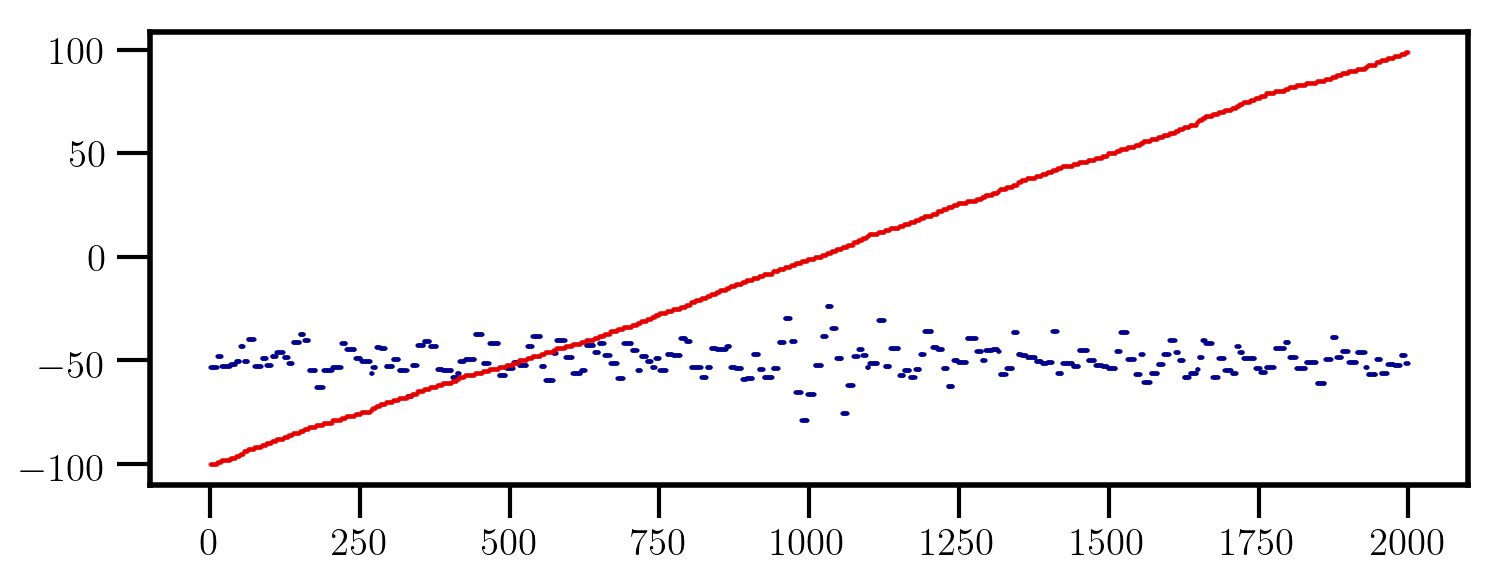

 epoch:   50 testing_cost: 0.0646702722

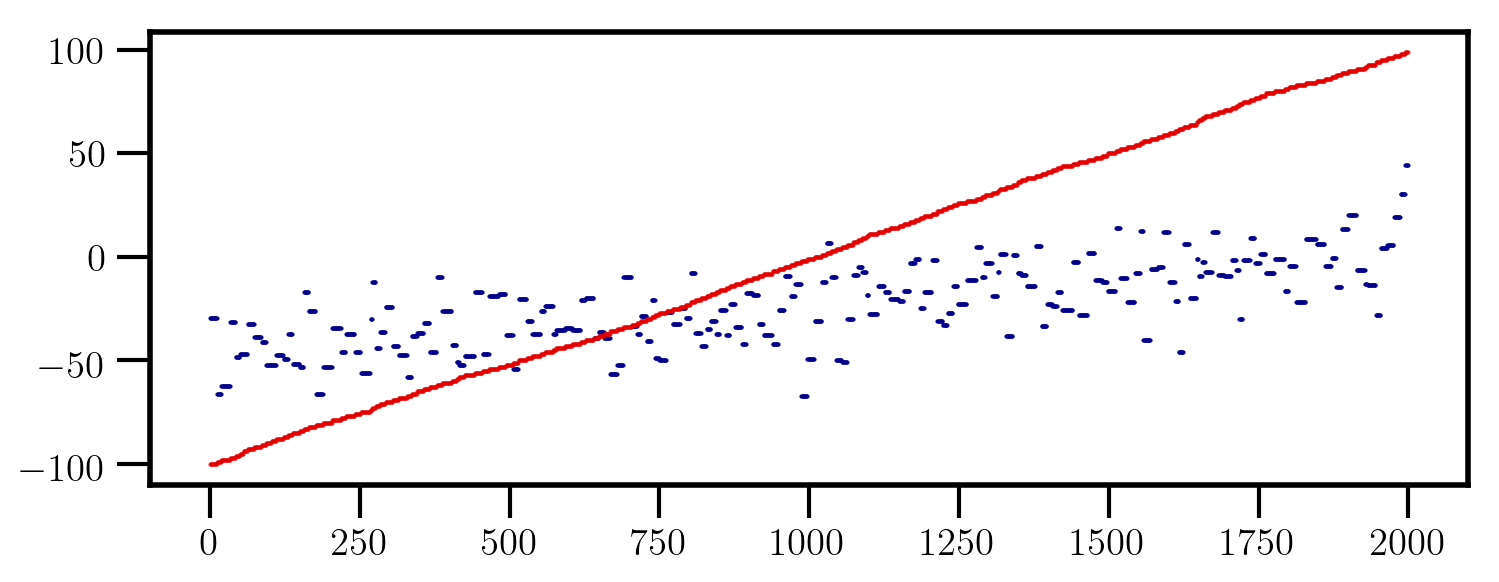

 epoch:  100 testing_cost: 0.0093500363

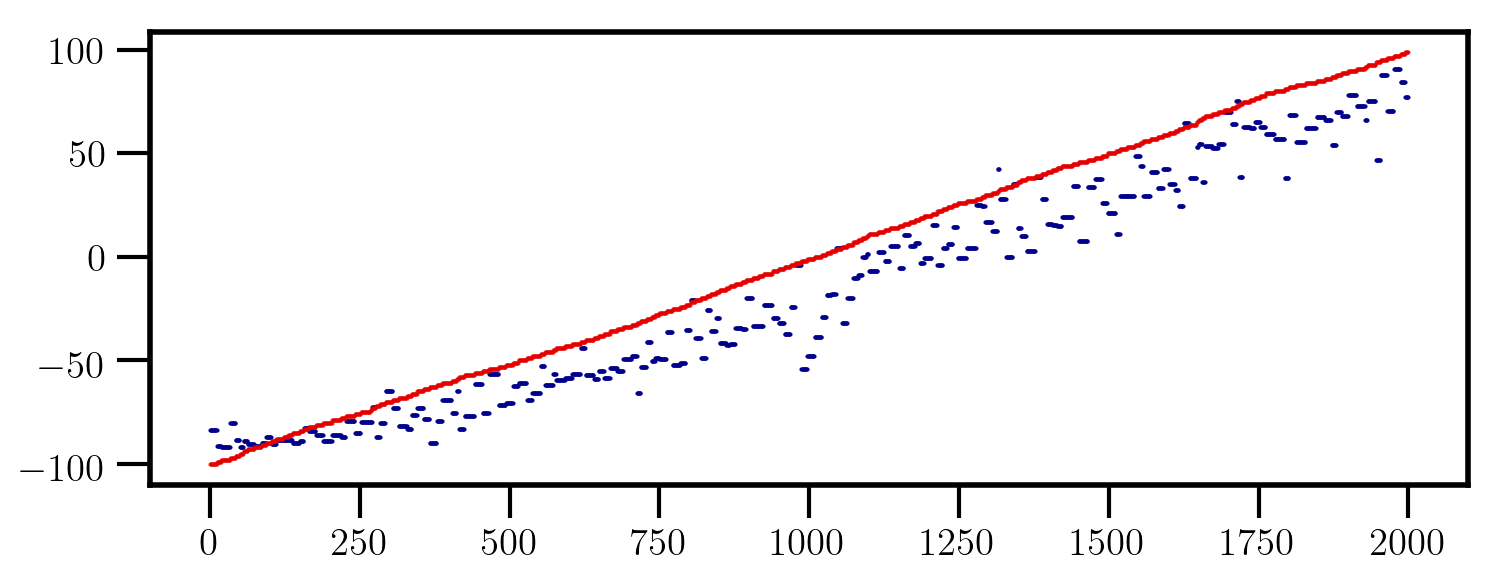

 epoch:  150 testing_cost: 0.0008398425

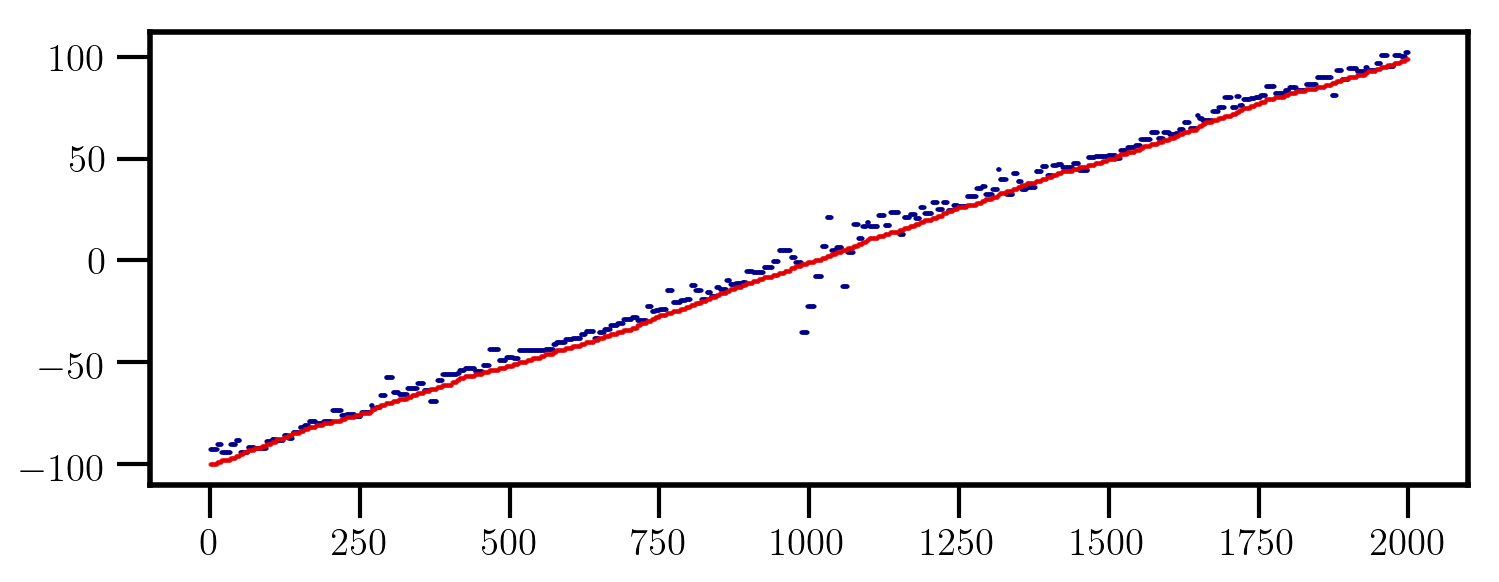

 epoch:  200 testing_cost: 0.0003248078

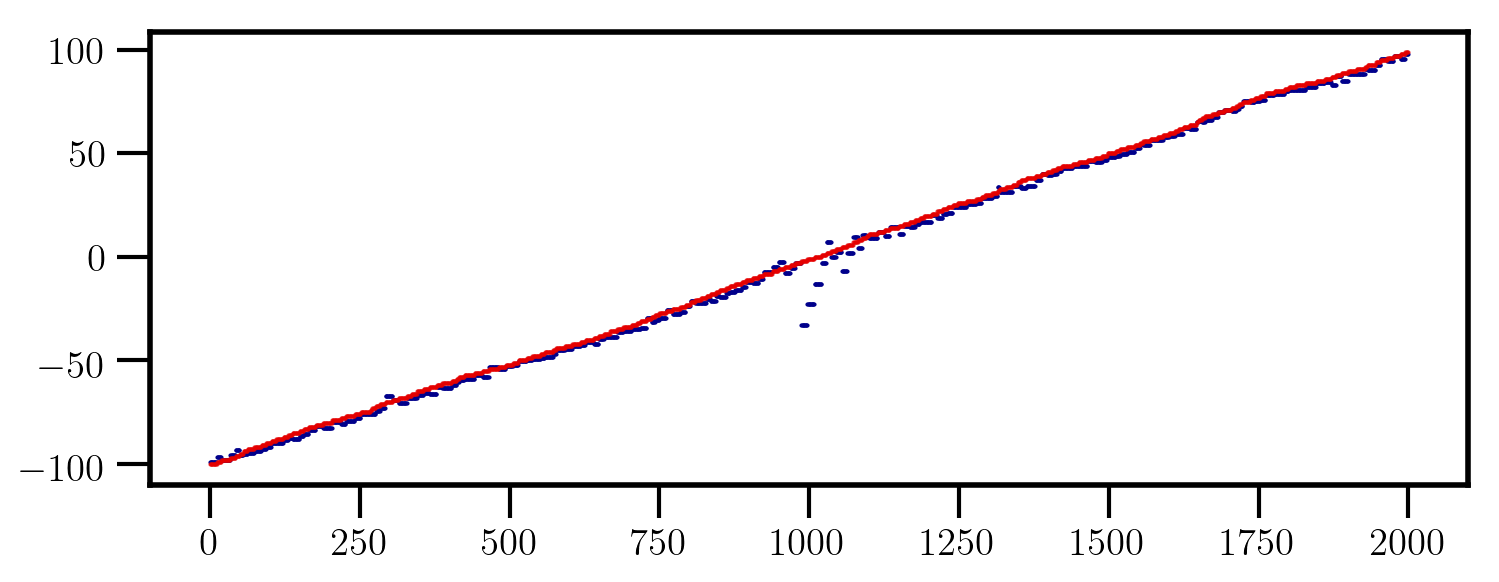

 epoch:  250 testing_cost: 0.0007977294

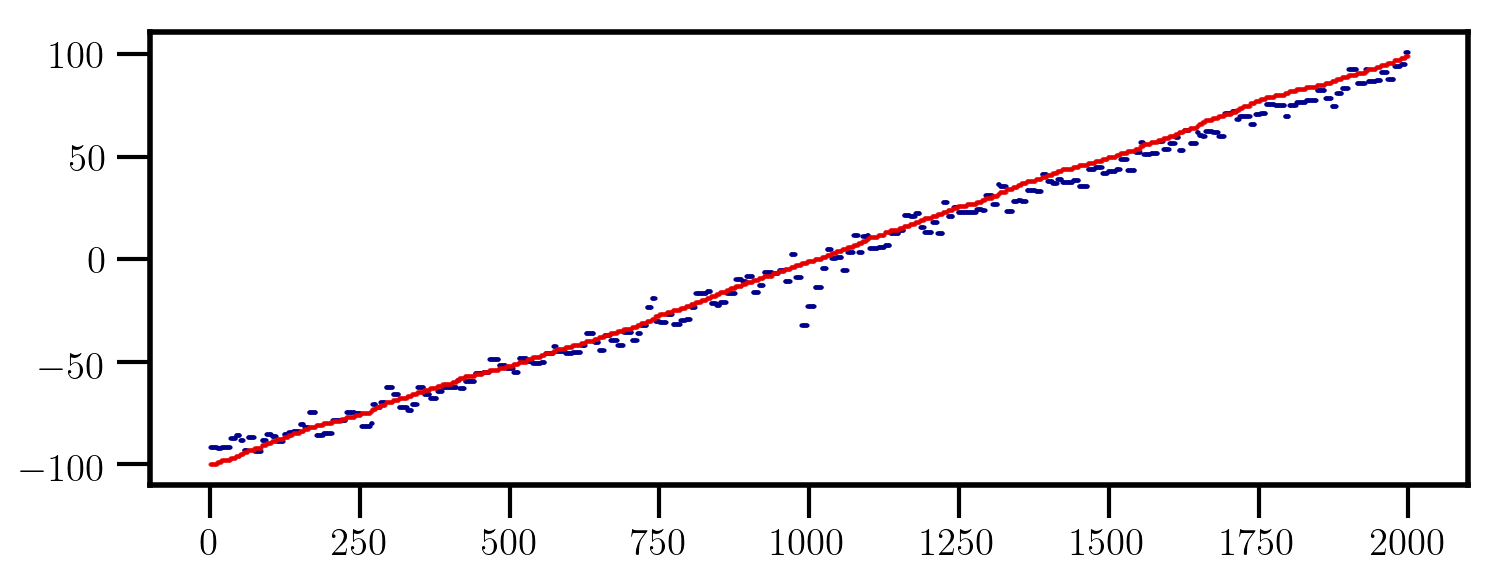

 epoch:  300 testing_cost: 0.0001234297

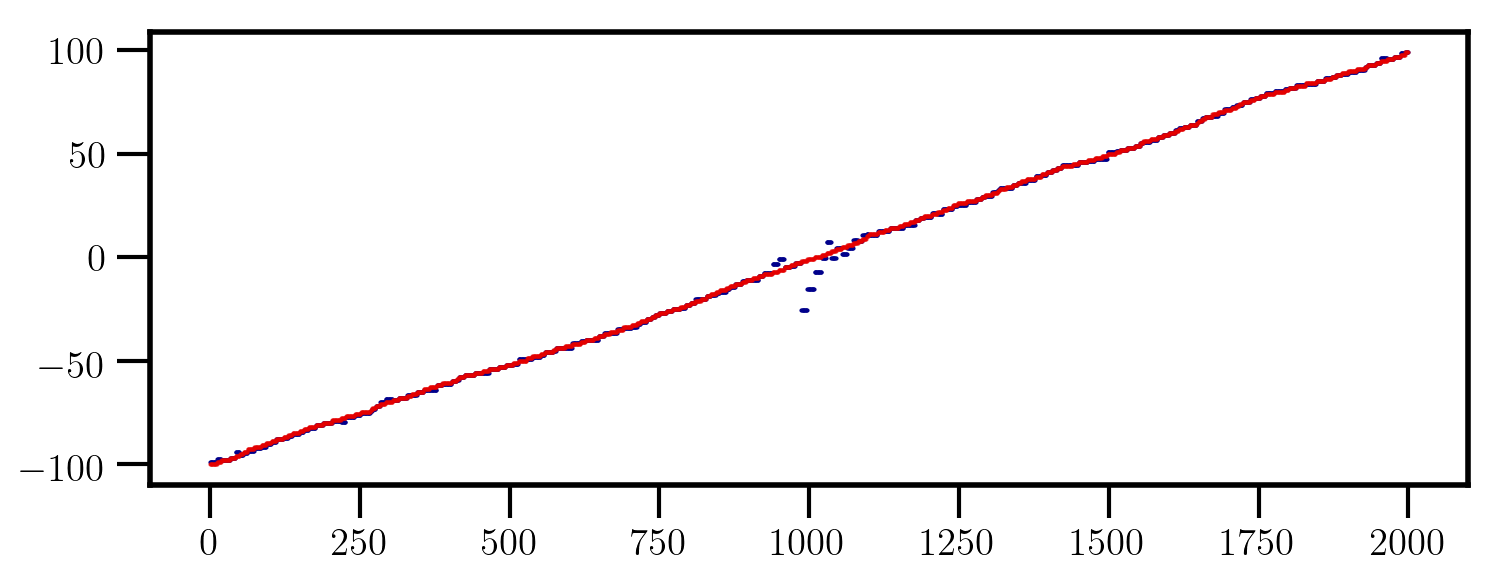

 epoch:  350 testing_cost: 0.0050295447

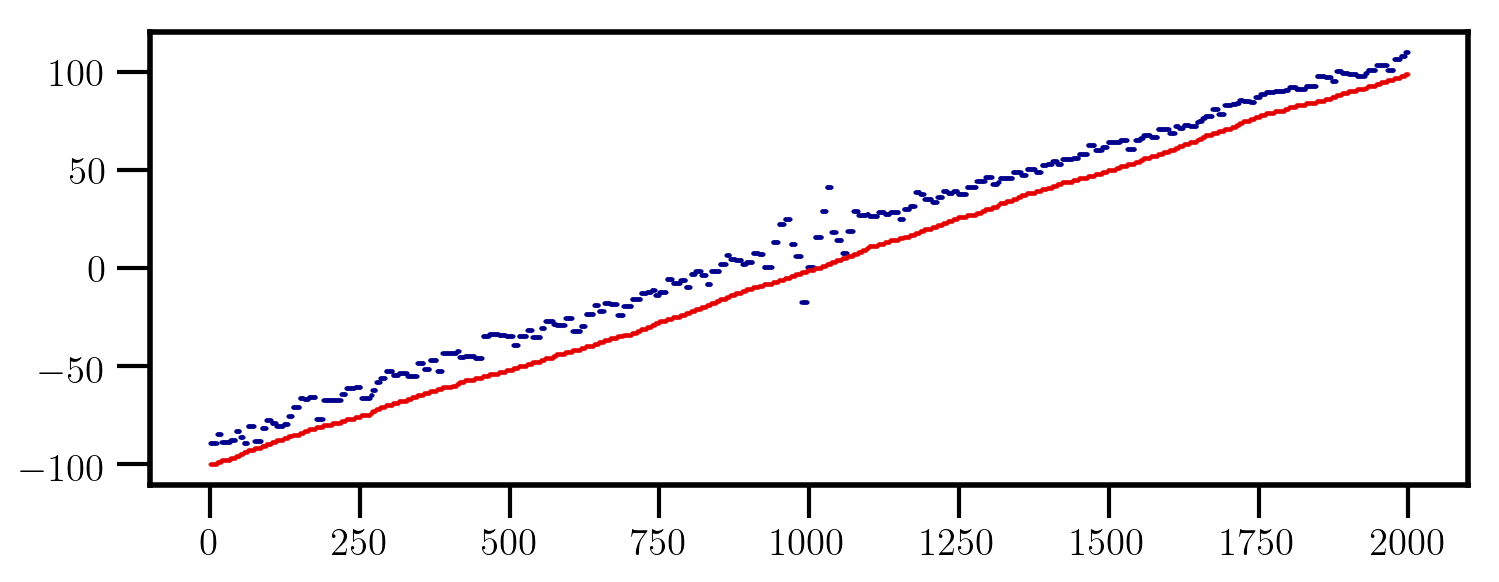

 epoch:  400 testing_cost: 0.0000719753

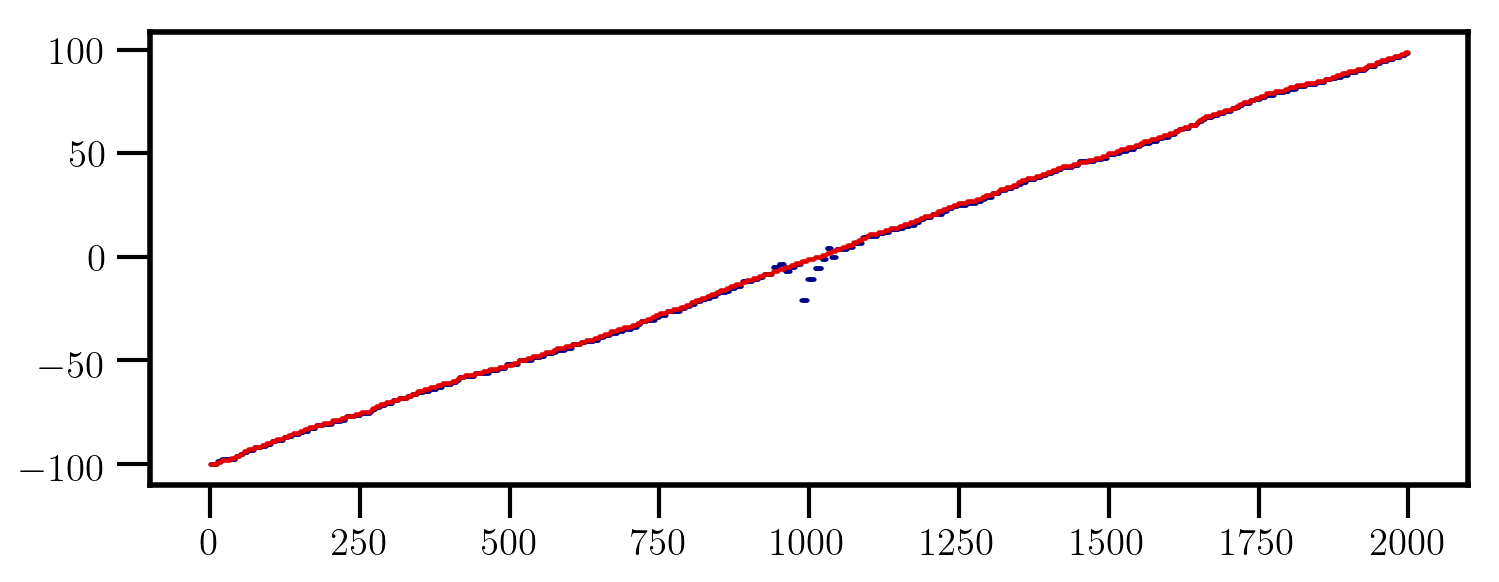

 epoch:  450 testing_cost: 0.0000372070

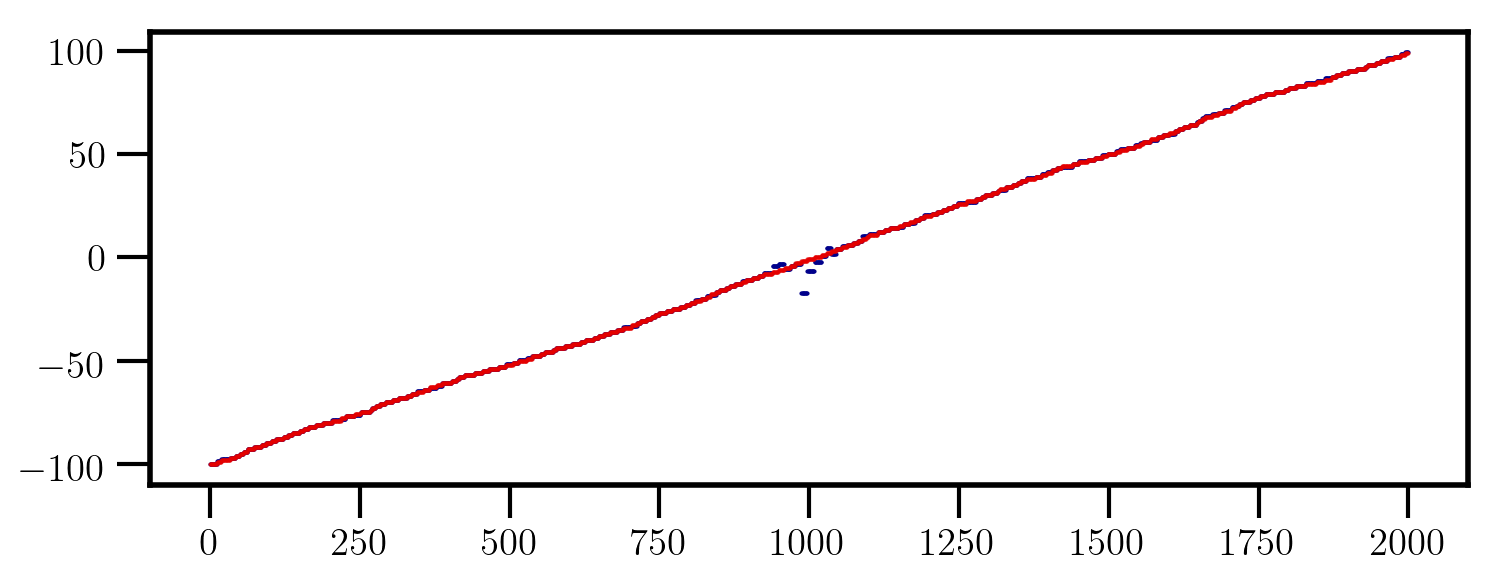

 epoch:  500 testing_cost: 0.0055083442

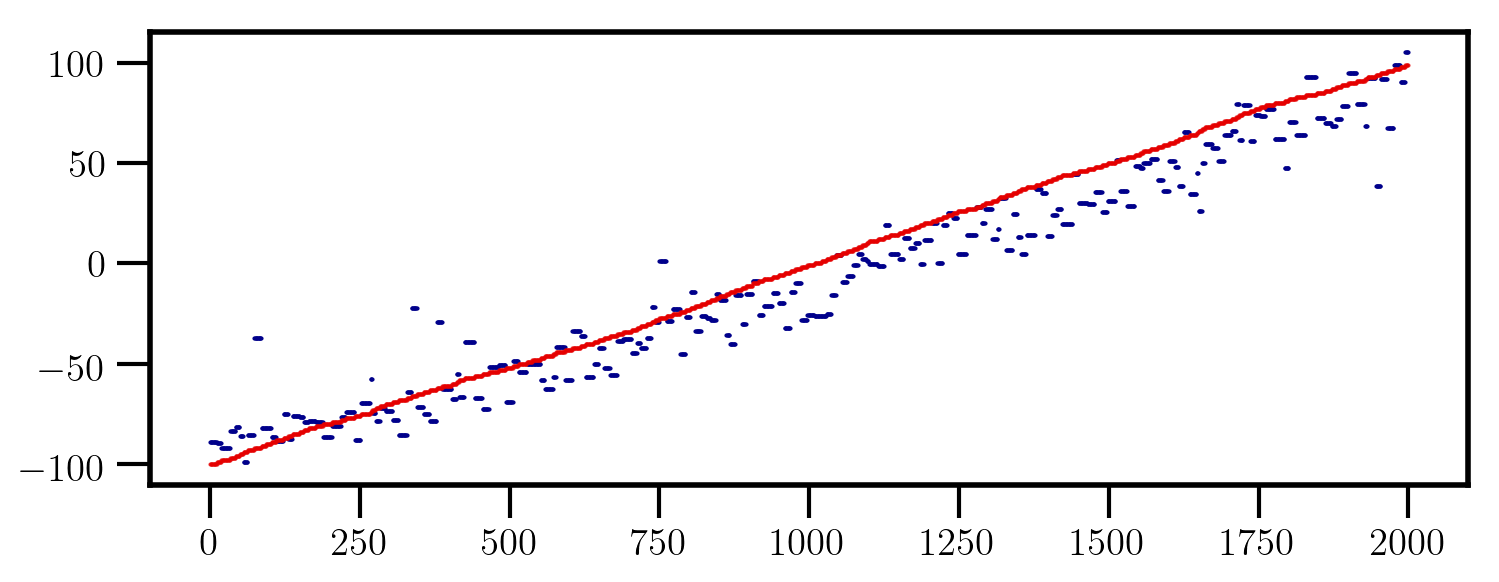

 epoch:  550 testing_cost: 0.0000834596

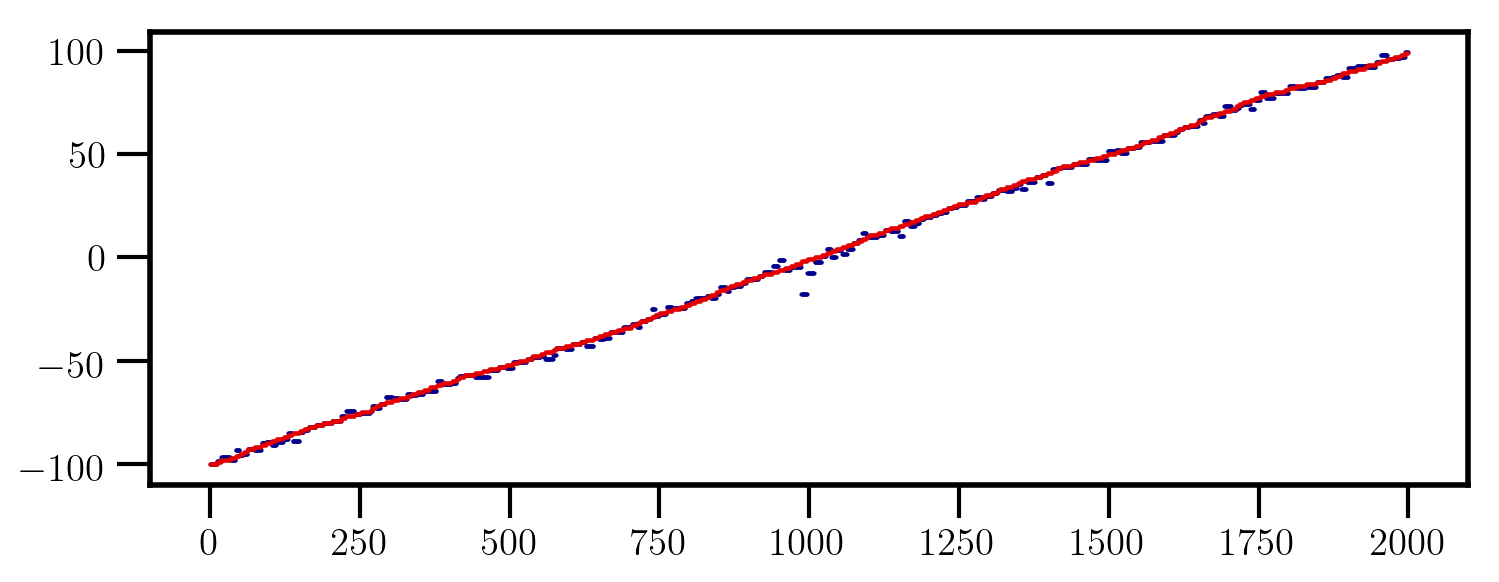

 epoch:  600 testing_cost: 0.0000217669

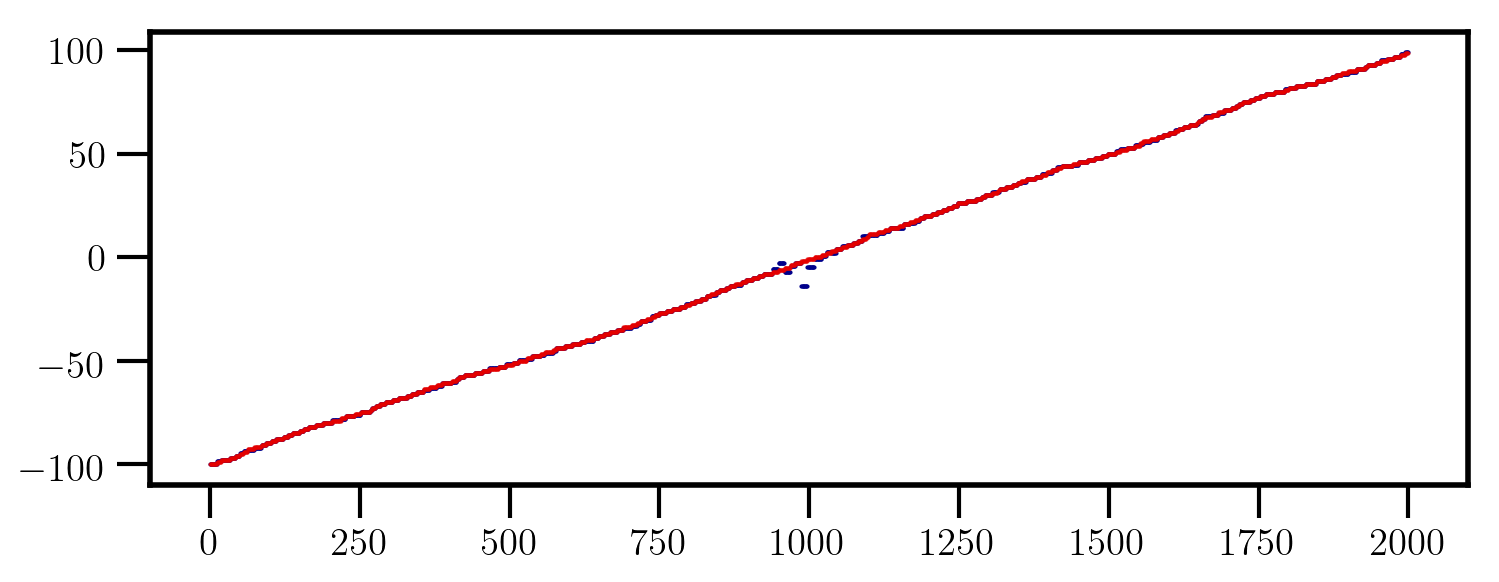

 epoch:  650 testing_cost: 0.0000120080

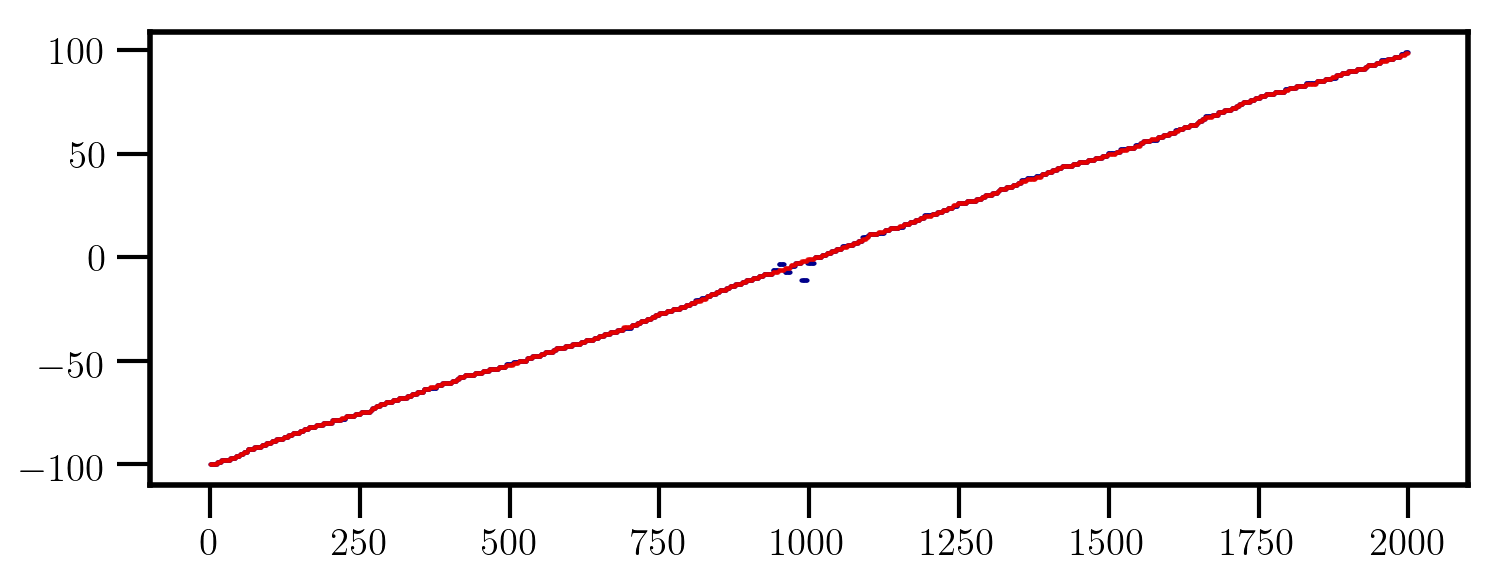

 epoch:  700 testing_cost: 0.0000070319

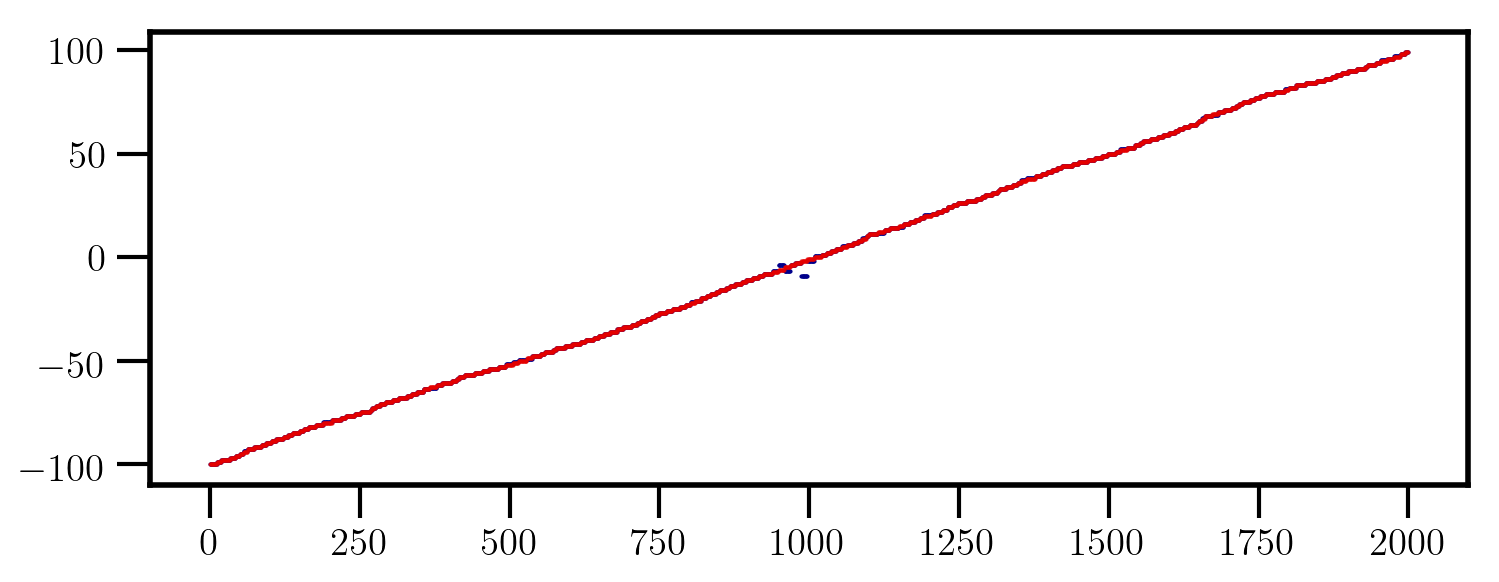

 epoch:  750 testing_cost: 0.0000042847

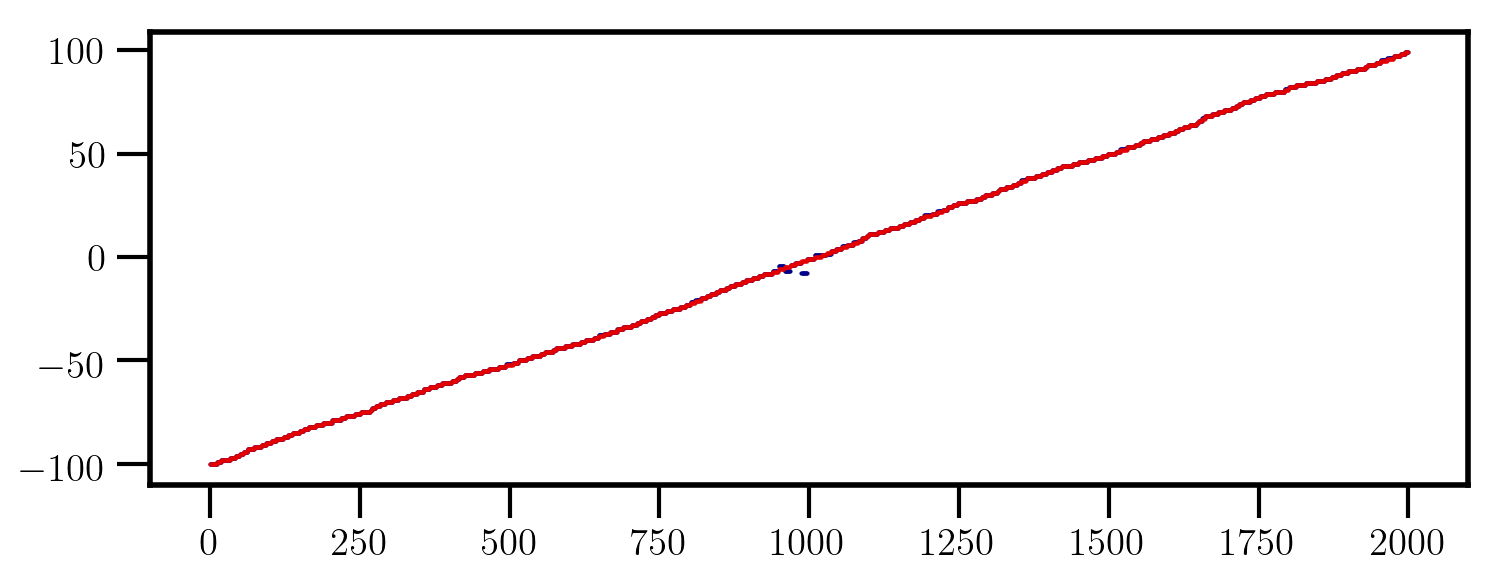

 epoch:  800 testing_cost: 0.0001582307

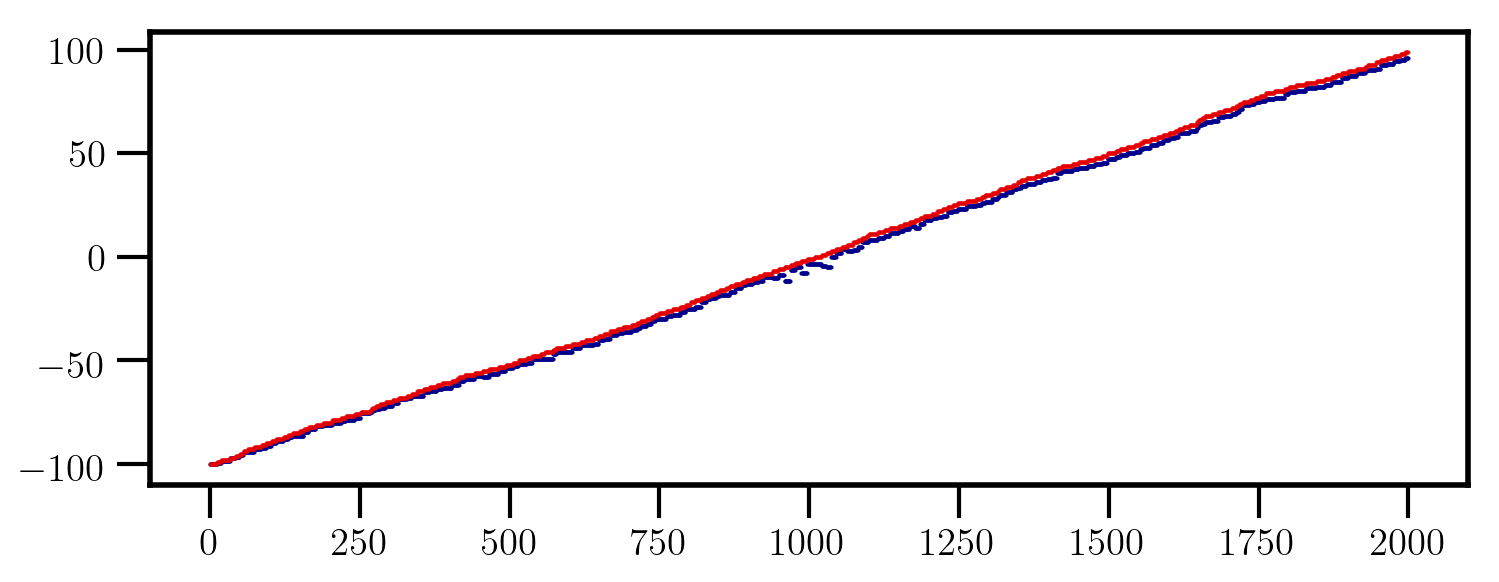

 epoch:  850 testing_cost: 0.0000032321

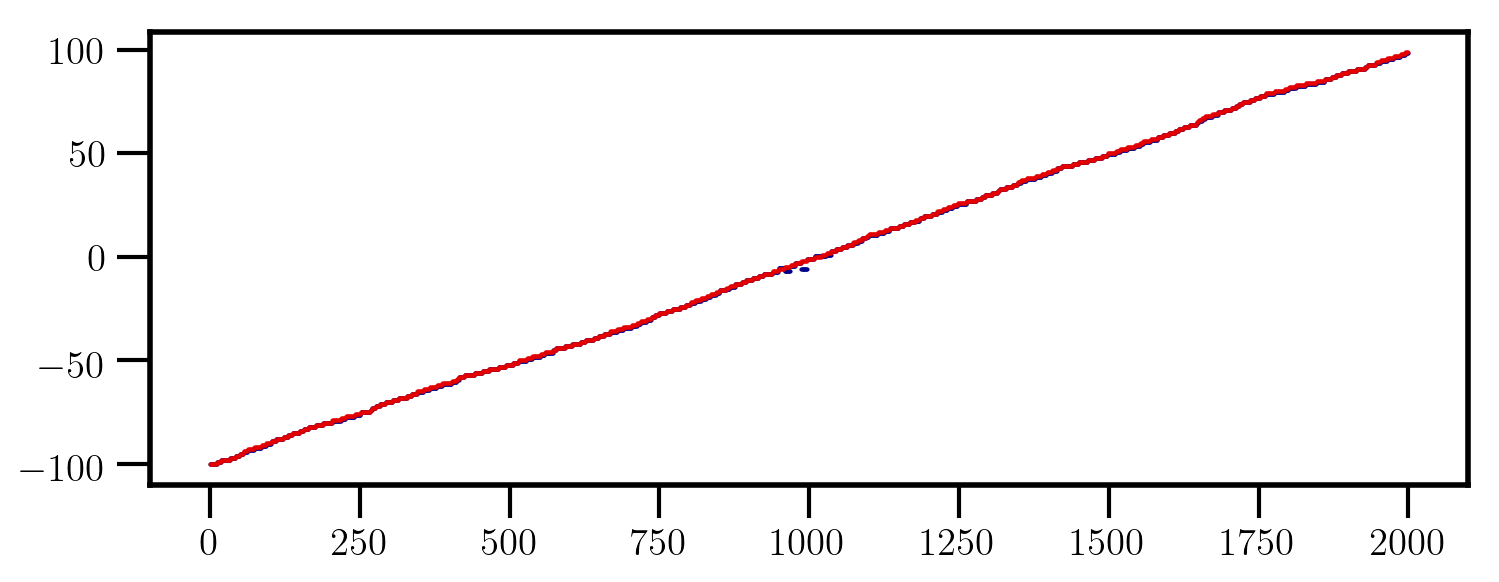

 epoch:  900 testing_cost: 0.0040114289

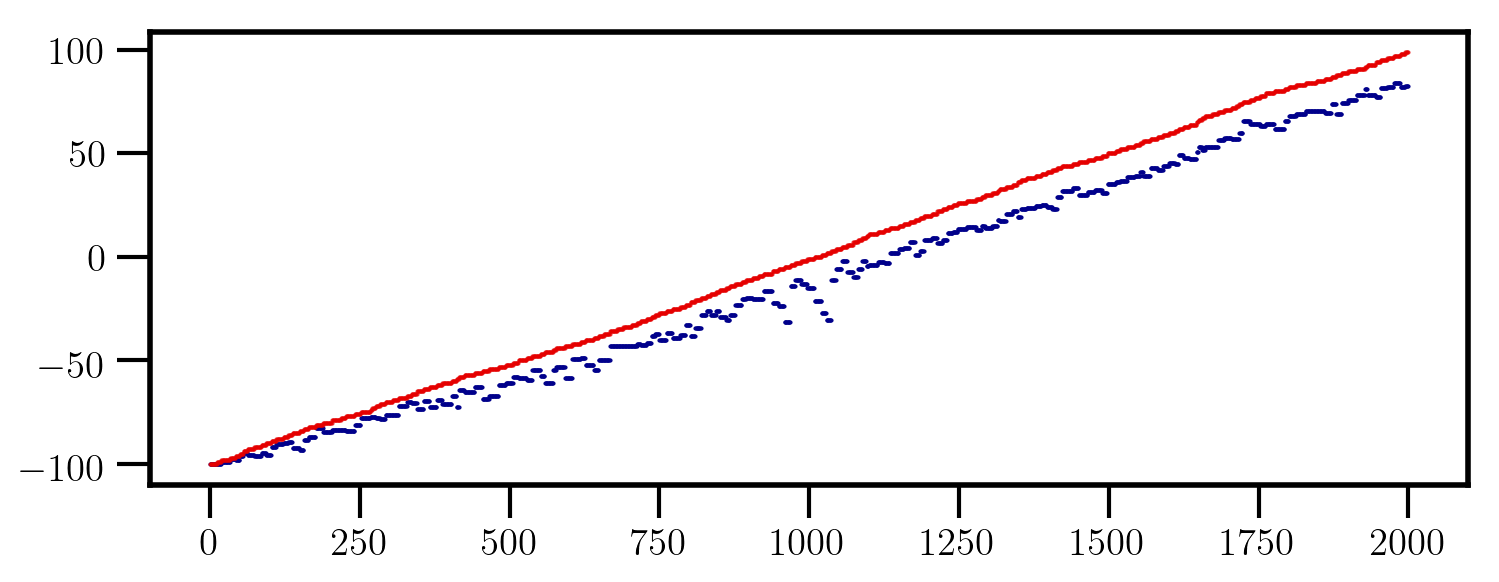

 epoch:  950 testing_cost: 0.0000171990

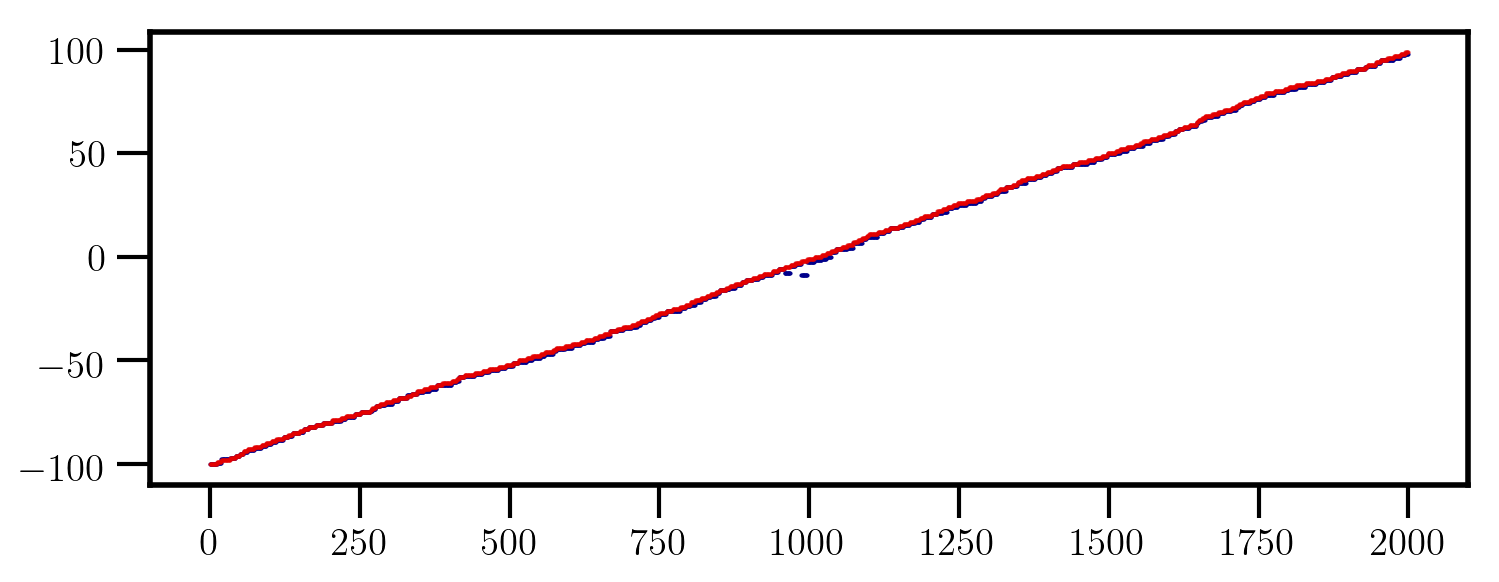

 epoch: 1000 testing_cost: 0.0000025177

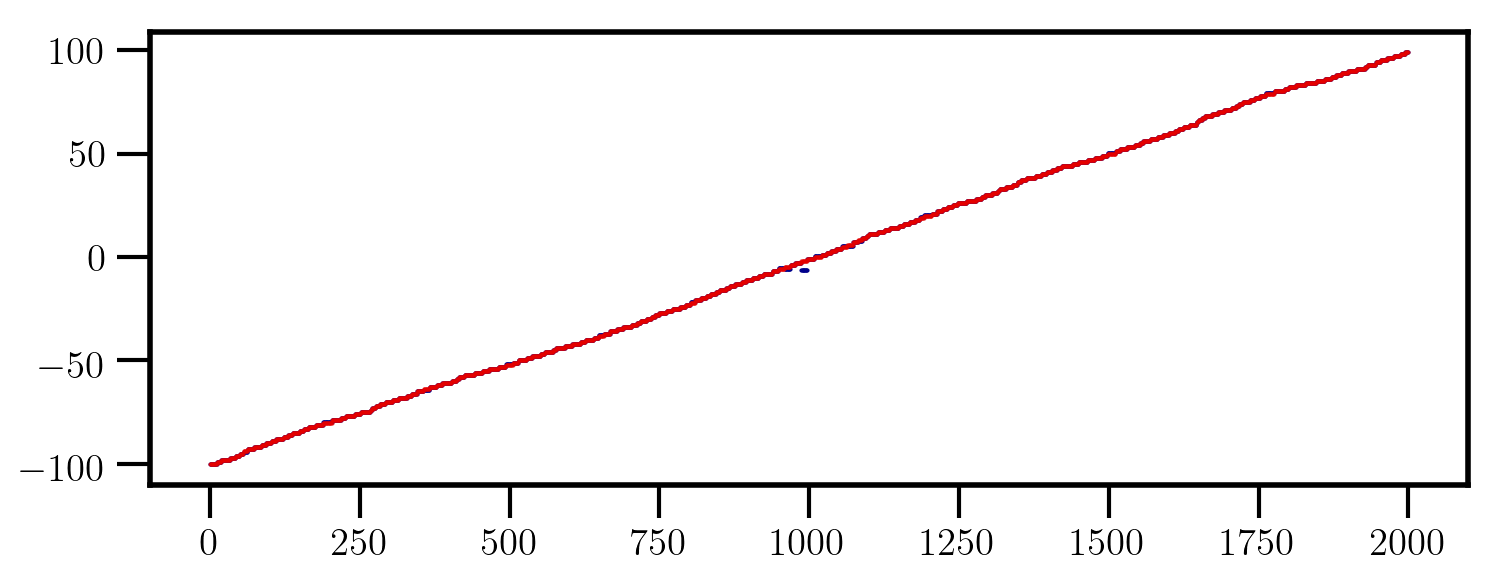

 epoch: 1050 testing_cost: 0.0000013958

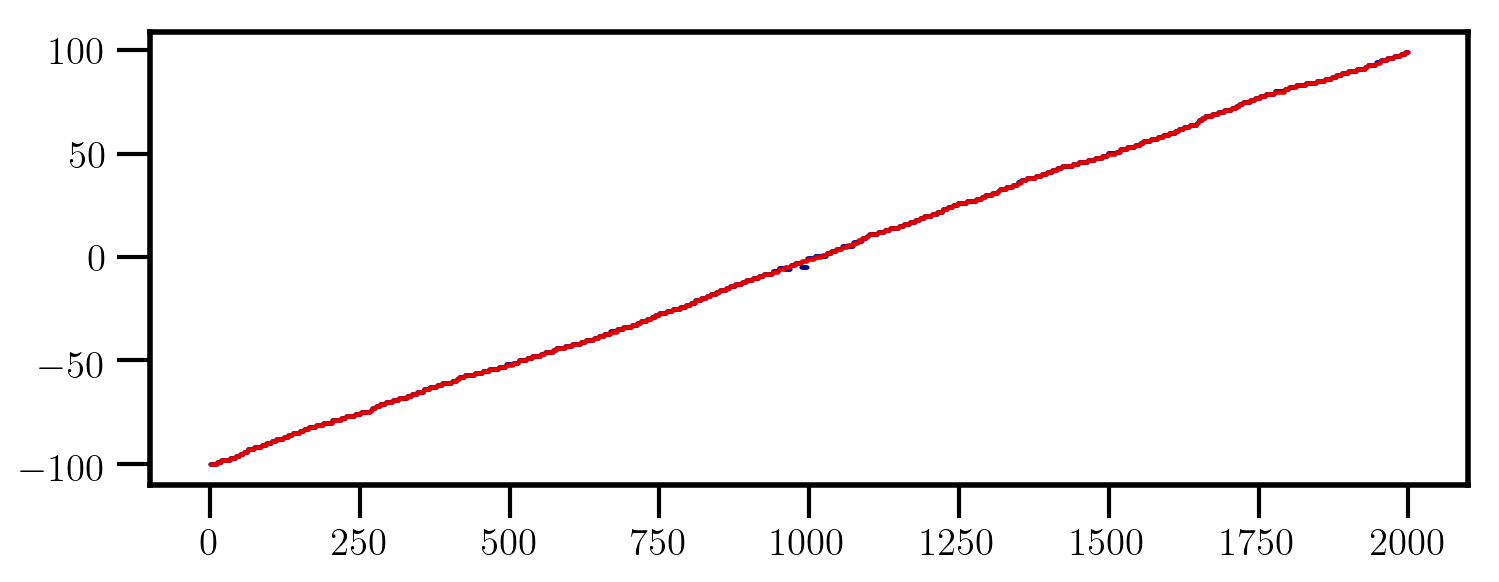

 epoch: 1100 testing_cost: 0.0000008309

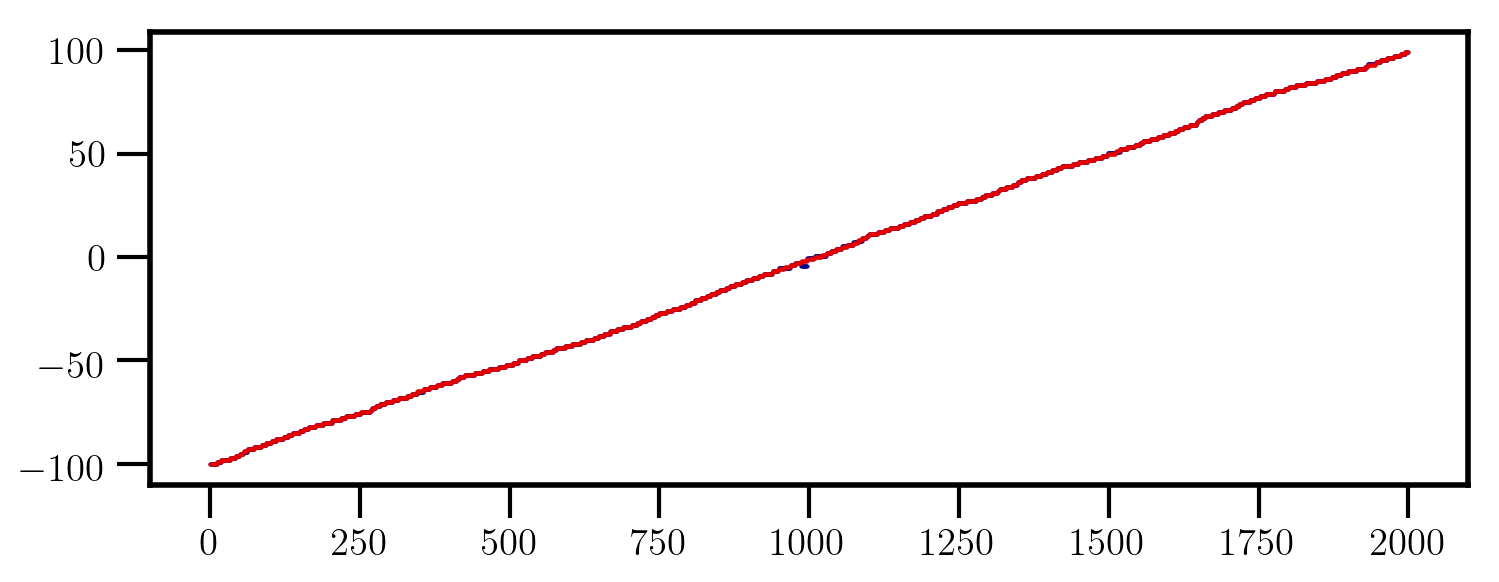

 epoch: 1150 testing_cost: 0.0000005074

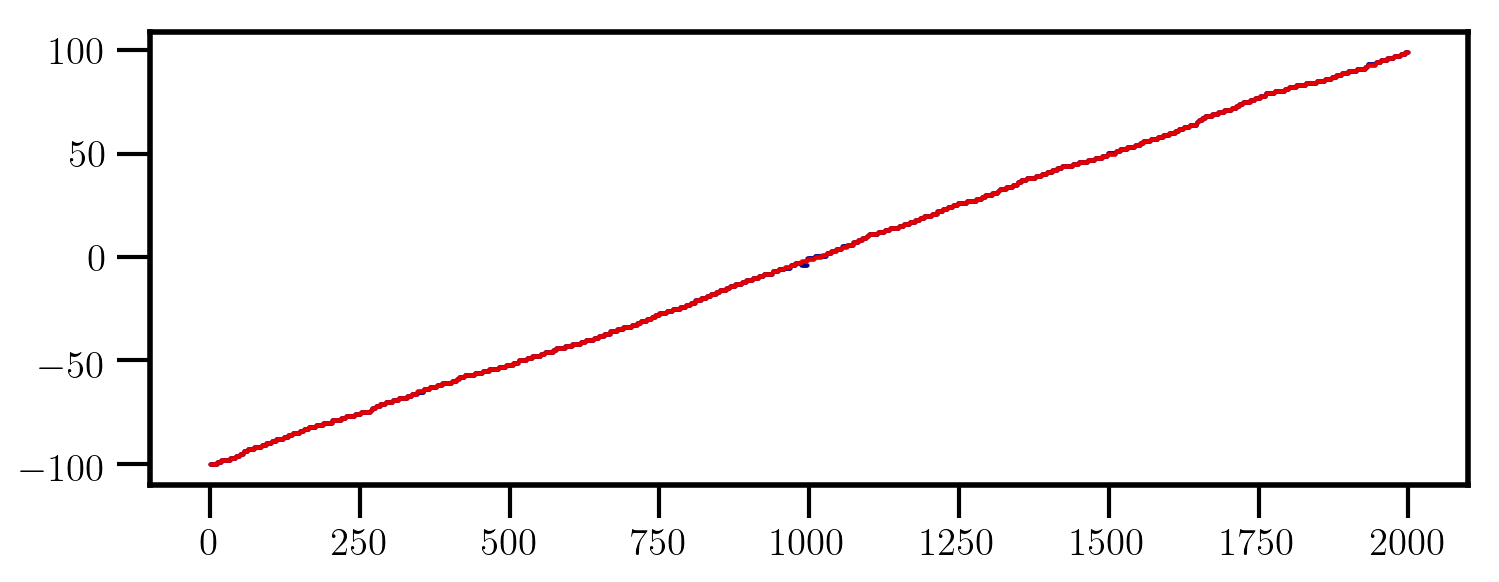

 epoch: 1200 testing_cost: 0.0000003218

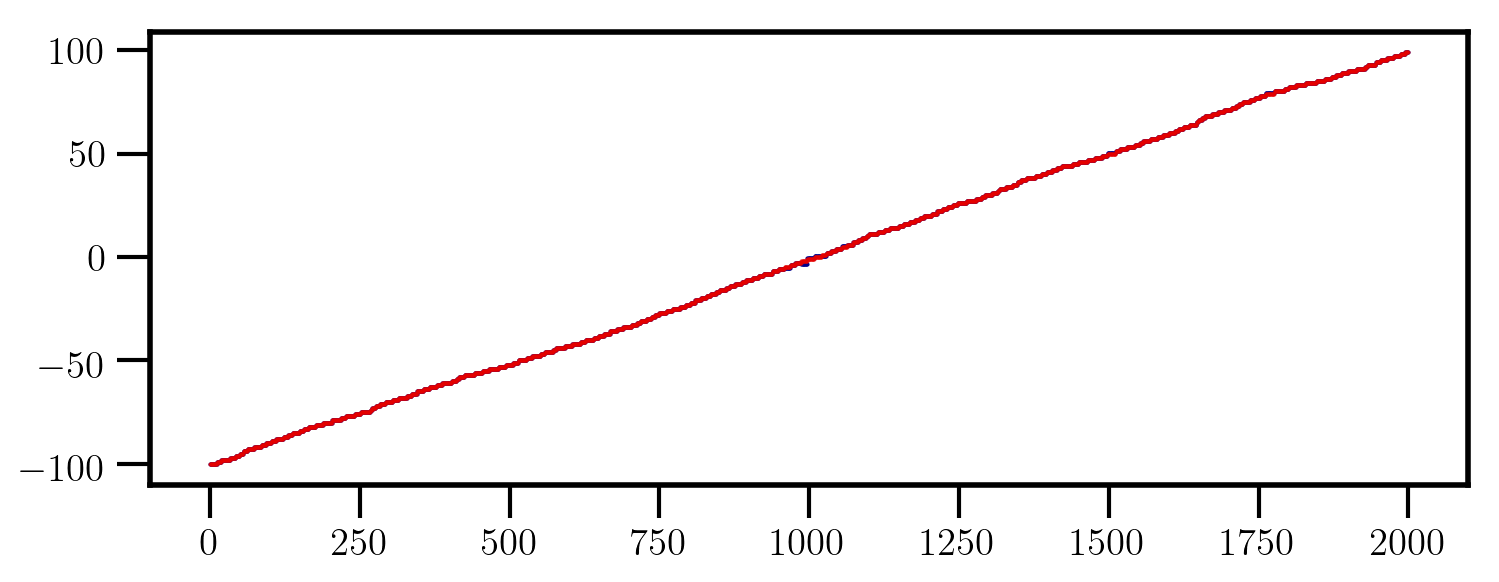

 epoch: 1250 testing_cost: 0.0004905884

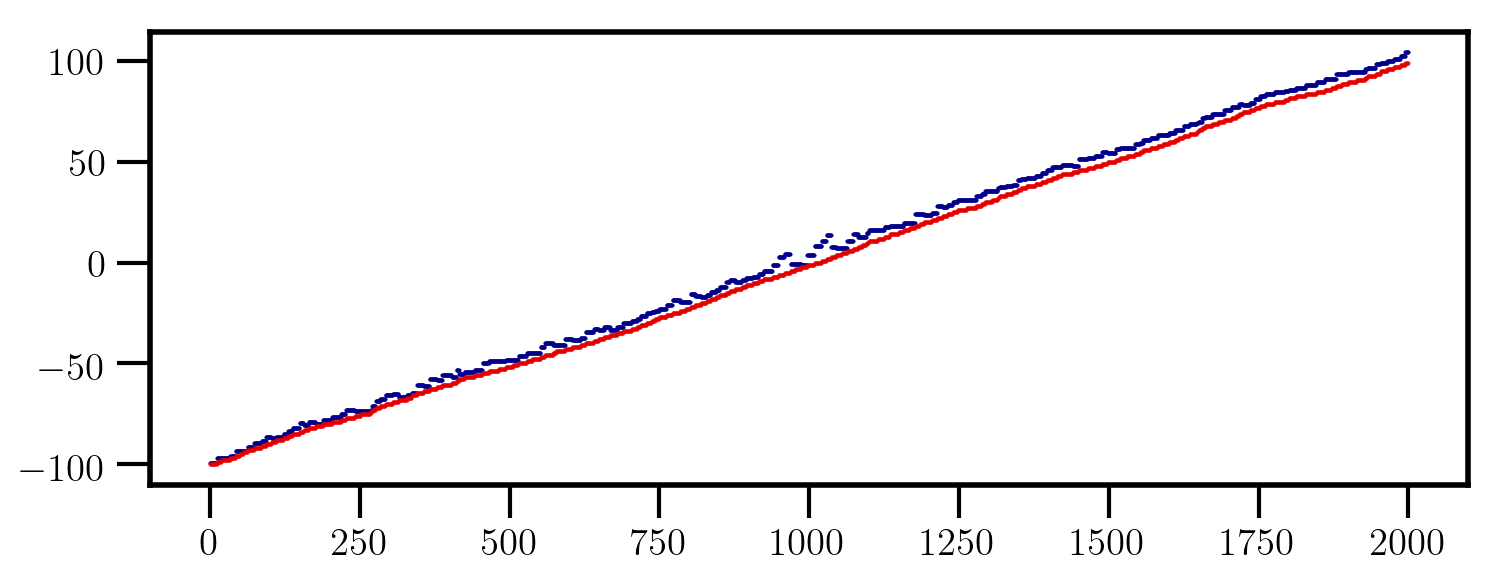

 epoch: 1300 testing_cost: 0.0000160113

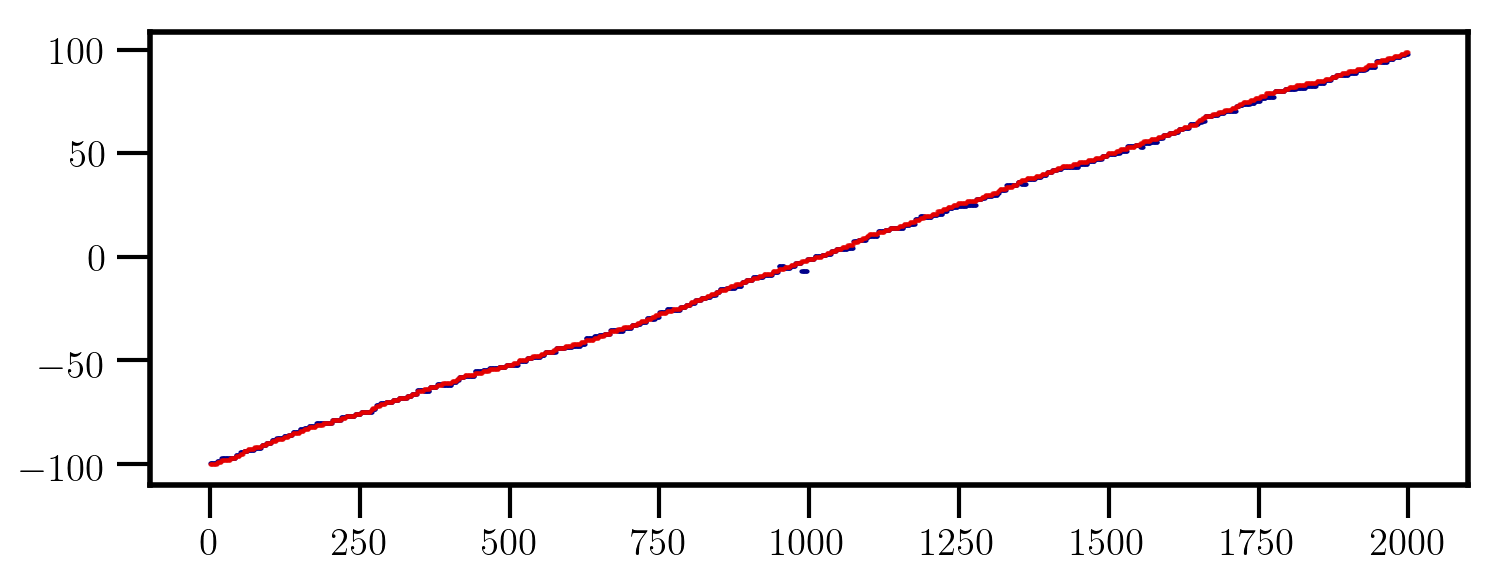

 epoch: 1350 testing_cost: 0.0000017822

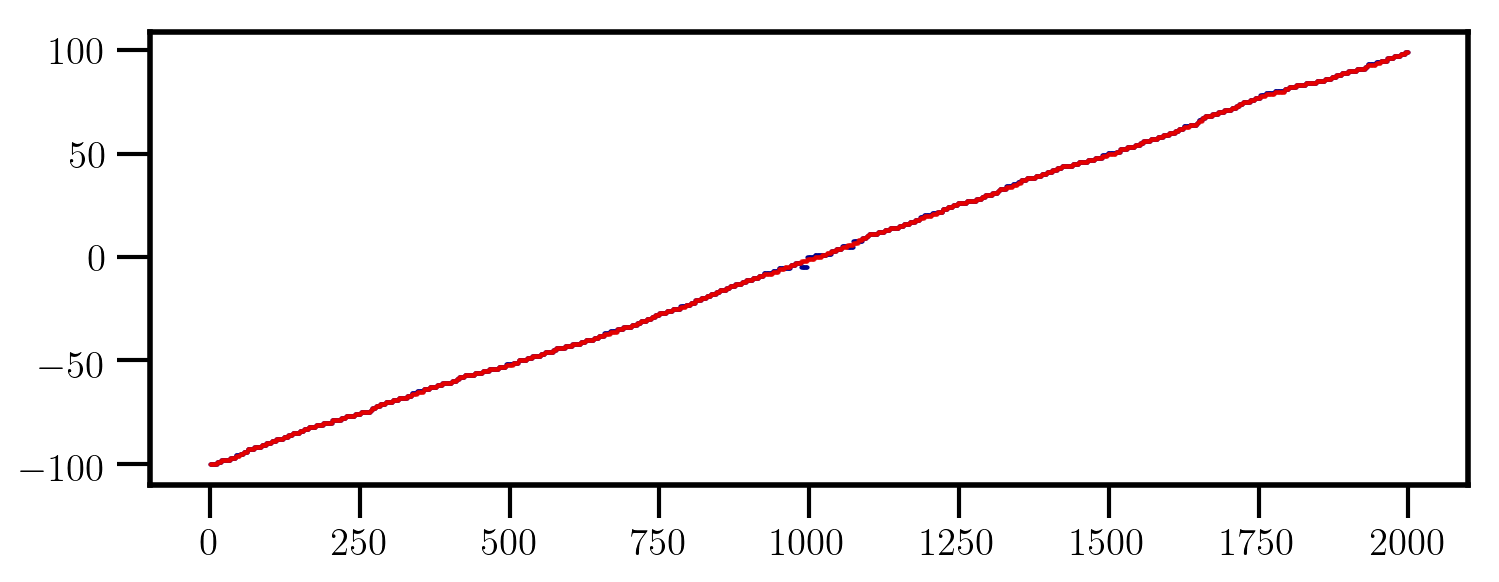

 epoch: 1400 testing_cost: 0.0000009516

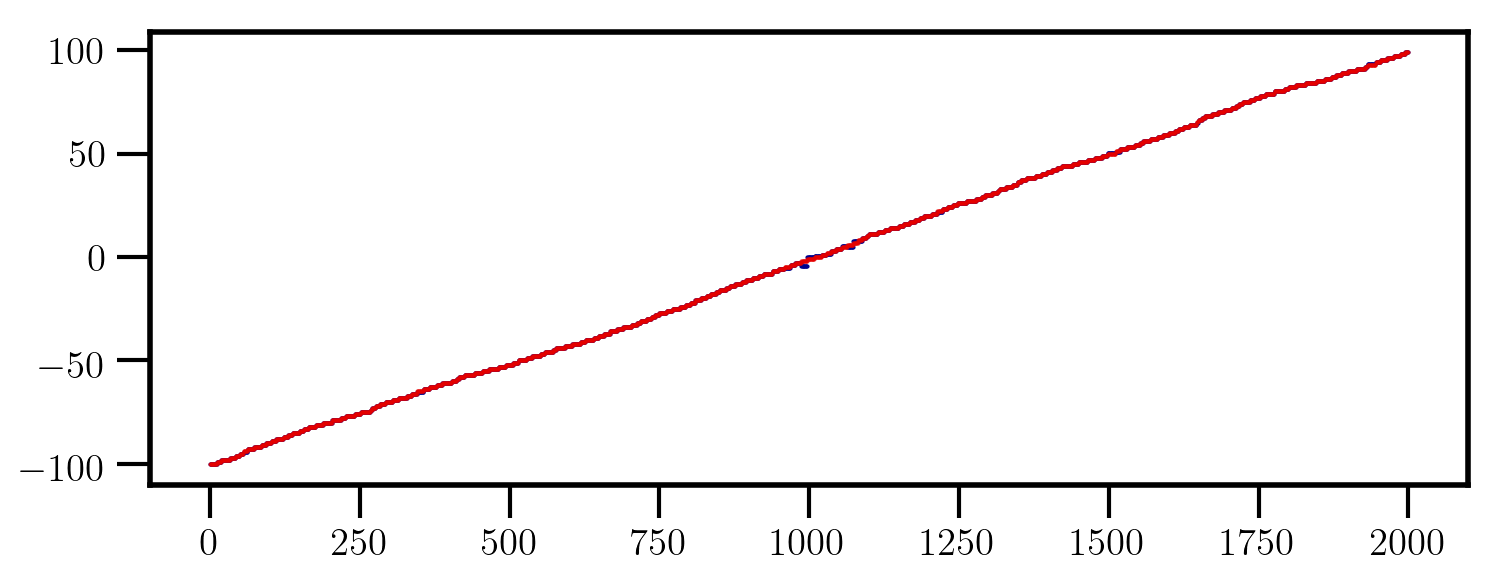

 epoch: 1450 testing_cost: 0.0000005896

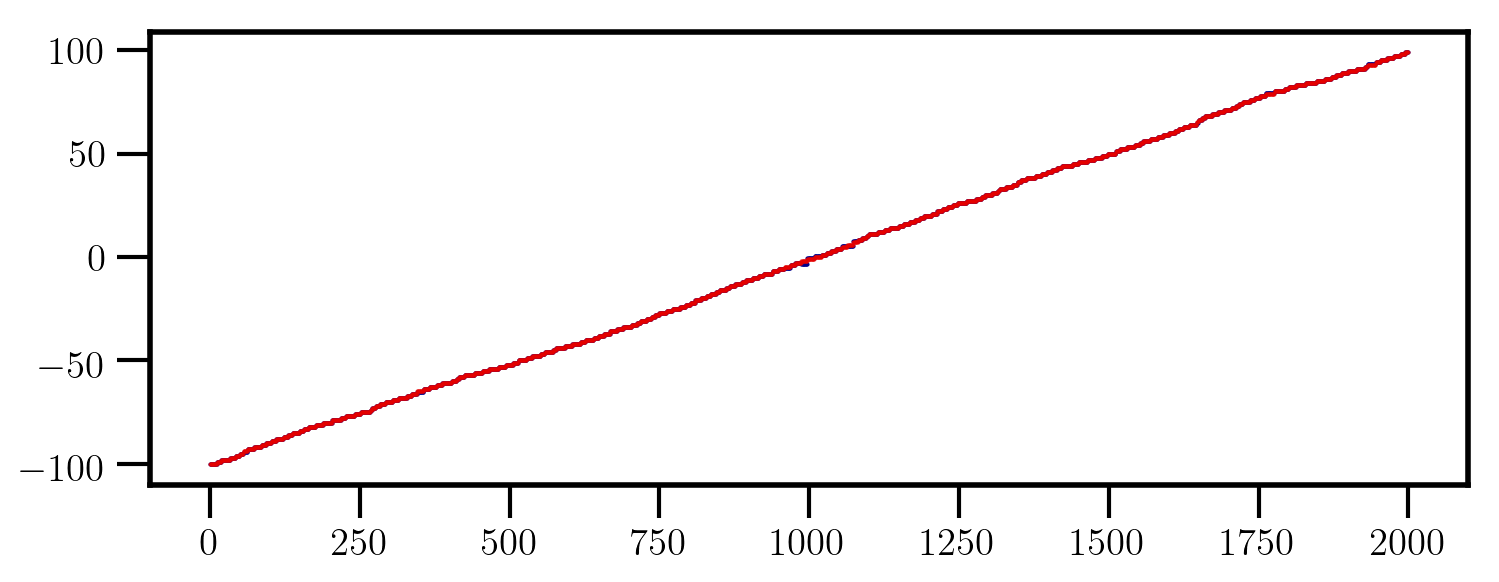

 epoch: 1499 testing_cost: 0.0000003687

In [18]:


with tf.Session() as session:

    session.run(tf.global_variables_initializer())

    training_writer = tf.summary.FileWriter(log_direc + '/training', session.graph)
    testing_writer = tf.summary.FileWriter(log_direc + '/testing', session.graph)
    model_save_location = log_direc + '/model/' + 'trained_model.ckpt'


    for epoch in range(training_epochs):

        # Feed in the training data and do one stepf NN training
        session.run(optimizer,
                    feed_dict = {X: X_scaled_training, Y: Y_scaled_training})

        training_feed = {X: X_scaled_training, Y: Y_scaled_training}
        training_cost, training_summary = session.run([cost, summary],
                                                feed_dict = training_feed)

        testing_feed =  {X: X_scaled_testing, Y: Y_scaled_testing}
        testing_cost, testing_summary = session.run([cost, summary],
                                                     feed_dict = testing_feed)
        sys.stdout.write('\r epoch: {:4.0f} testing_cost: {:2.10f}'.format(epoch, training_cost))
        
        training_writer.add_summary(training_summary, epoch)
        testing_writer.add_summary(testing_summary, epoch)
        testing_writer.flush()
        training_writer.flush()
        
        if epoch % 50 == 0:
            saver.save(session, model_save_location, epoch)
            prediction_scaled = session.run(prediction, feed_dict = {X: X_scaled_testing})
            prediction_unscaled = Y_scaler.inverse_transform(prediction_scaled)
            sorting_idx = np.argsort(Y_testing.T[0])
        
            fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 100)
            
            ax.plot(prediction_unscaled.T[0][sorting_idx],
                    linestyle = 'none', marker = '.', markersize = 1,
                    color = 'darkblue', label = 'Prediction')
            
            ax.plot(Y_testing.T[0][sorting_idx],
                    linestyle = 'none', marker = '.', markersize = 1, alpha = 0.75, 
                    color = '#E50000', label = 'Actual')
            plt.show()



    save_path = saver.save(session, model_save_location)

#### Test NN round 5

> Lets load up the saved model and compare the predictions it makes against our test data.

In [20]:
with tf.Session() as session:
    saver.restore(session,model_save_location + '-' + str(1450))
    
    prediction_scaled = session.run(prediction, feed_dict = {X: X_scaled_testing})
    
    # the predictions but in the original units
    prediction_unscaled = Y_scaler.inverse_transform(prediction_scaled)

INFO:tensorflow:Restoring parameters from ../logs/81230/model/trained_model.ckpt-1450


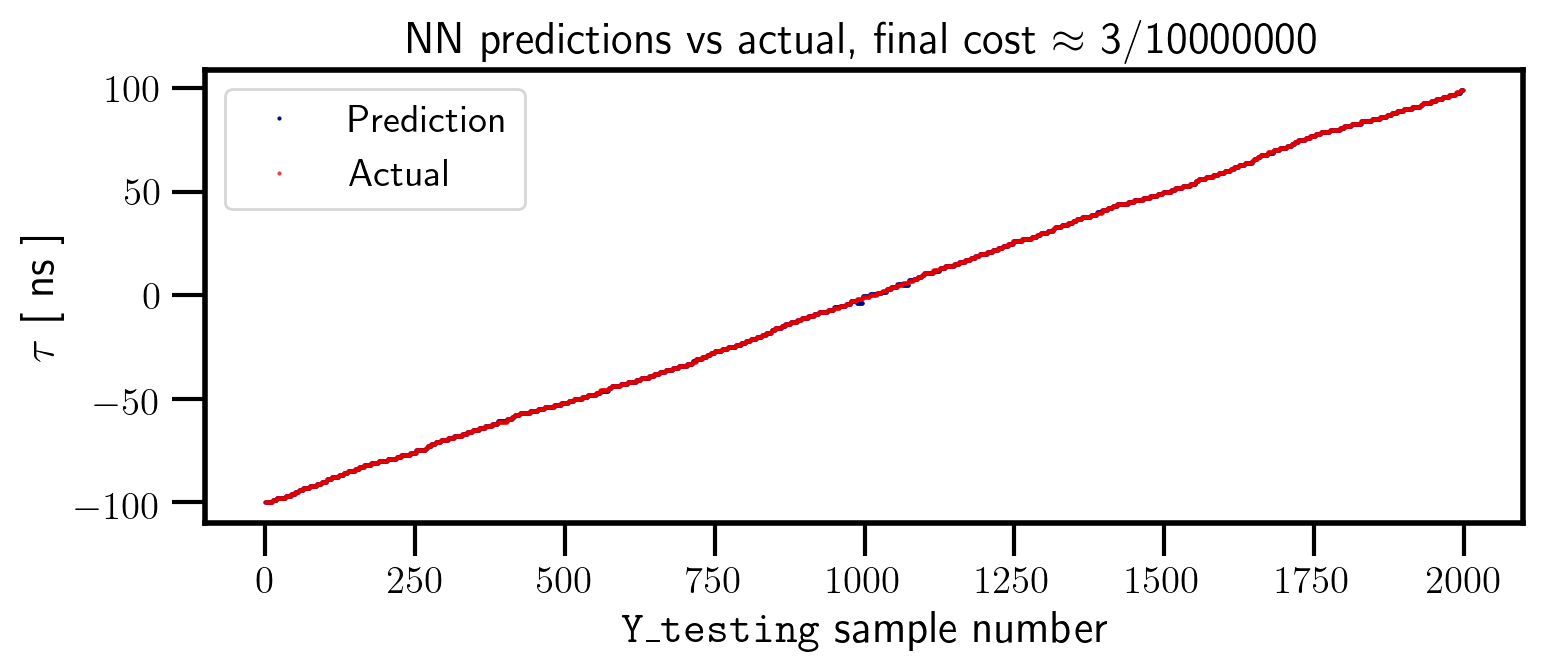

In [22]:
sorting_idx = np.argsort(Y_testing.T[0])

fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 100)

ax.set_title(r'NN predictions vs actual, final cost $\approx$ 3/10000000')
ax.plot(prediction_unscaled.T[0][sorting_idx],
        linestyle = 'none', marker = '.', markersize = 1,
        color = 'darkblue', label = 'Prediction')

ax.plot(Y_testing.T[0][sorting_idx],
        linestyle = 'none', marker = '.', markersize = 1, alpha = 0.75, 
        color = '#E50000', label = 'Actual')

ax.set_ylabel(r'$\tau$ [ ns ]')
ax.set_xlabel(r'$\texttt{Y\_testing}$ sample number')
ax.legend( loc = 'best')
plt.show()

In [23]:
NN_SCORE = sum((Y_scaled_testing.T[0] - prediction_scaled.T[0])**2)
NN_SCORE

0.001125514318930075

In [25]:
np.std(abs(Y_testing.T[0] - prediction_unscaled.T[0]))

0.1452563755070023

In [26]:
np.mean(abs(Y_testing.T[0] - prediction_unscaled.T[0]))

0.03444316744804617